In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import os
import glob

## Read the input

In [2]:
# bin to cluster (8,302 lines)
cdb = pd.read_csv('input/Cdb.csv')
cdb['sample'] = cdb['genome'].str.split('_').str[0]

cdb.to_excel('results/First_clusters_details.xlsx', index=False)
cdb.head()

,genome,secondary_cluster,threshold,cluster_method,comparison_algorithm,primary_cluster,sample
0,VG36F3_maxbin.004.fa,1_1,0.05,average,fastANI,1,VG36F3
1,VGYSAU_maxbin.084.fa,1_1,0.05,average,fastANI,1,VGYSAU
2,VF8Q00_metabat.189.fa,2_1,0.05,average,fastANI,2,VF8Q00
3,VZ5D83_maxbin.010.fa,2_1,0.05,average,fastANI,2,VZ5D83
4,VE8VBP_maxbin.008.fa,3_0,0.05,average,fastANI,3,VE8VBP


In [3]:
sm = len(cdb['sample'].unique())
print('Number of samples: ', sm)

gn = len(cdb['genome'].unique())
print('Total number of bins: ', gn)

cl1 = len(cdb['primary_cluster'].unique())
print('Number of primary clusters: ', cl1)

cl2 = len(cdb['secondary_cluster'].unique())
print('Number of secondary clusters: ', cl2)

Number of samples:  142
Total number of bins:  8302
Number of primary clusters:  1043
Number of secondary clusters:  1196


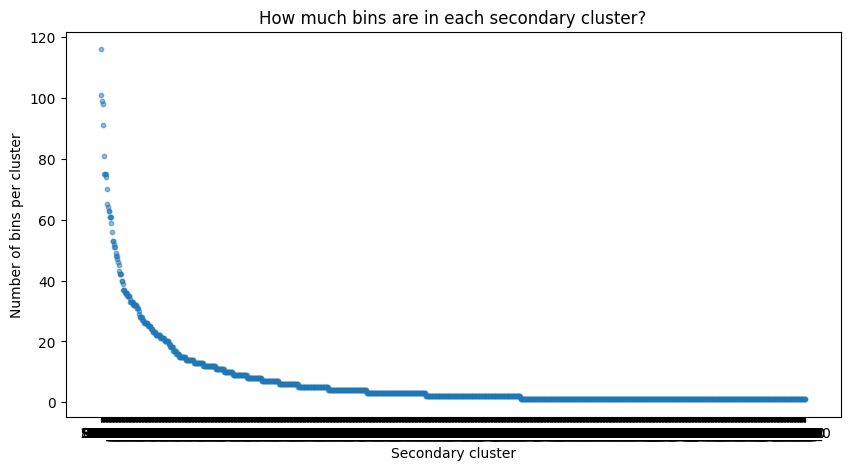

In [39]:
cldet = cdb['secondary_cluster'].value_counts()

# plot
plt.figure(figsize=(10, 5))
plt.scatter(cldet.index, cldet.values, s=10, alpha=0.5)
plt.xlabel('Secondary cluster')
plt.ylabel('Number of bins per cluster')
plt.title('How much bins are in each secondary cluster?')

plt.savefig('results/secondary_cluster.png', dpi=300, bbox_inches='tight')

In [7]:
# compl & contam (10,010 lines)
gen = pd.read_csv('input/genomeInformation.csv')
gen.head()

,genome,completeness,contamination,strain_heterogeneity,length,N50,centrality
0,V0404P_181434.fa,98.66,0.00,0.00,1908262,52167,0.988038
1,V0404P_184256.fa,94.54,0.19,50.00,2178702,48365,0.986244
2,V0404P_220966_sub.fa,99.32,44.75,26.27,6538835,16643,0.000000
3,V0404P_maxbin.037.fa,93.62,4.70,0.00,2464390,38398,0.990315
4,V0404P_metabat.110.fa,97.34,0.48,100.00,2680403,63941,0.977108
